In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
from scipy.signal import convolve2d
import numpy as np

# Example matrices (image and kernel)
image = np.array([[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]])

kernel = np.array([[1, 0, 0],
          [0, 0, 0],
          [0, 0, 0]])

# Perform 2D convolution with mode='same'
result_same = convolve2d(image, kernel, mode='same')

print("Original Image:")
print(image)
print("\nKernel:")
print(kernel)
print("\nResult of Convolution with mode='same':")
print(result_same)


Original Image:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Kernel:
[[1 0 0]
 [0 0 0]
 [0 0 0]]

Result of Convolution with mode='same':
[[5 6 0]
 [8 9 0]
 [0 0 0]]


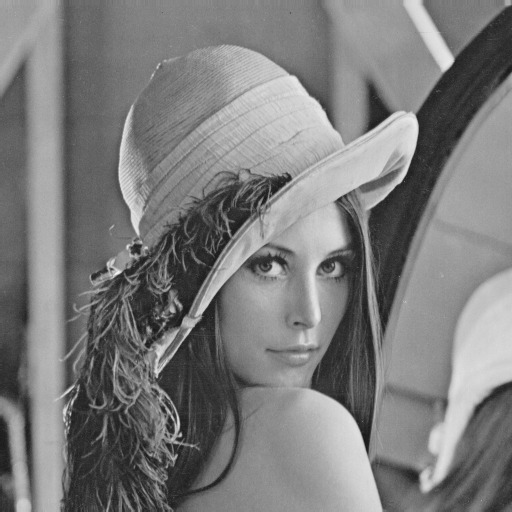

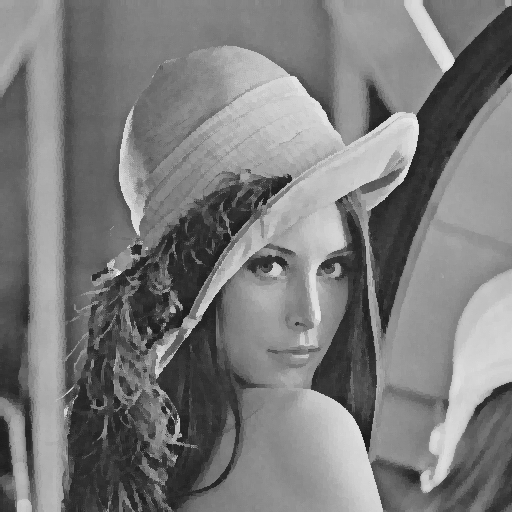

In [25]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def kuwahara_filter(image, window_size=5):
    height, width, channels = image.shape
    half_window = window_size // 2

    # Pad the image
    padded_image = cv2.copyMakeBorder(image, half_window, half_window, half_window, half_window, cv2.BORDER_REFLECT)

    filtered_image = np.zeros_like(image, dtype=np.uint8)

    for y in range(half_window, height + half_window):
        for x in range(half_window, width + half_window):
            regions = {
                'a': padded_image[y - half_window:y, x - half_window:x],
                'b': padded_image[y:y + half_window, x:x + half_window],
                'c': padded_image[y:y + half_window, x - half_window:x],
                'd': padded_image[y - half_window:y, x:x + half_window]
            }

            output_values = []

            for region_name, region in regions.items():
                mean, std_dev = cv2.meanStdDev(region)
                output_values.append((mean[0], std_dev[0], region_name))

            # Choose the region with the minimum variance
            min_var_region = min(output_values, key=lambda x: x[1])

            # Set the pixel value to the mean value of the chosen region
            filtered_image[y - half_window, x - half_window] = min_var_region[0]

    return filtered_image

# Load an example image
image = cv2.imread('/content/drive/MyDrive/digImage/gray.jpg')
# image = cv2.imread('/content/drive/MyDrive/digImage/filter-image.jpg')
# Apply Kuwahara filter
filtered_image = kuwahara_filter(image)

# Display the original and filtered images
cv2_imshow(image)
cv2_imshow(filtered_image)



In [3]:
import cv2
import numpy as np

def kuwahara_filter(image, window_size=5):
    height, width, channels = image.shape
    half_window = window_size // 2

    # Pad the image
    padded_image = cv2.copyMakeBorder(image, half_window, half_window, half_window, half_window, cv2.BORDER_REFLECT)

    filtered_image = np.copy(image)

    for y in range(half_window, height + half_window):
        for x in range(half_window, width + half_window):
            regions = {
                'a': padded_image[y - half_window:y, x - half_window:x],
                'b': padded_image[y - half_window:y, x:x + half_window],
                'c': padded_image[y:y + half_window, x - half_window:x],
                'd': padded_image[y:y + half_window, x:x + half_window]
            }

            output_values = []

            for region_name, region in regions.items():
                mean, std_dev = cv2.meanStdDev(region)
                output_values.append((mean[0], std_dev[0], region_name))

            # Choose the region with the minimum variance
            min_var_region = min(output_values, key=lambda x: x[1])

            # Set the pixel value to the mean value of the chosen region
            filtered_image[y - half_window, x - half_window] = min_var_region[0]

    return filtered_image

# Load an example image
image = cv2.imread('/content/drive/MyDrive/digImage/gray.jpg')

# Apply Kuwahara filter
filtered_image = kuwahara_filter(image)

# Display the original and filtered images
cv2_imshow(image)
cv2_imshow(filtered_image)

NameError: ignored

In [51]:
import numpy as np

def create_x_pattern(size):
    arr = np.zeros((size, size), dtype=float)
    mid = size // 2

    # Set diagonals to 1.0
    arr[np.arange(size), np.arange(size)] = 1.0
    arr[np.arange(size), np.arange(size - 1, -1, -1)] = 1.0

    return arr

def extend_subwindow(subwindow, position, original_size):
    extended_array = np.zeros((original_size, original_size), dtype=float)
    extended_array[position[0]:position[0] + subwindow.shape[0], position[1]:position[1] + subwindow.shape[1]] = subwindow
    return extended_array

# Specify the size of the original array and subwindow
original_array_size = 5
subwindow_size = 3

# Create the 'X' pattern array with float values
x_pattern = create_x_pattern(original_array_size)
#x_pattern = x_pattern / sum(x_pattern)

# Create subwindows
top_left_subwindow = x_pattern[:subwindow_size, :subwindow_size]
top_right_subwindow = x_pattern[:subwindow_size, -subwindow_size:]
bottom_left_subwindow = x_pattern[-subwindow_size:, :subwindow_size]
bottom_right_subwindow = x_pattern[-subwindow_size:, -subwindow_size:]

# Extend subwindows to the original size
extended_top_left_subwindow = extend_subwindow(top_left_subwindow, (0, 0), original_array_size)
extended_top_right_subwindow = extend_subwindow(top_right_subwindow, (0, original_array_size - subwindow_size), original_array_size)
extended_bottom_left_subwindow = extend_subwindow(bottom_left_subwindow, (original_array_size - subwindow_size, 0), original_array_size)
extended_bottom_right_subwindow = extend_subwindow(bottom_right_subwindow, (original_array_size - subwindow_size, original_array_size - subwindow_size), original_array_size)

# Print the extended subwindows
print("Extended Top Left Subwindow:")
print(np.sum(x_pattern))
print("\nExtended Top Right Subwindow:")
print(extended_top_right_subwindow)
print("\nExtended Bottom Left Subwindow:")
print(extended_bottom_left_subwindow)
print("\nExtended Bottom Right Subwindow:")
print(extended_bottom_right_subwindow)


Extended Top Left Subwindow:
9.0

Extended Top Right Subwindow:
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

Extended Bottom Left Subwindow:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]

Extended Bottom Right Subwindow:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [24]:
import numpy as np

winsize = 5

tmpAvgKerRow = np.hstack((np.ones((1, (winsize-1)//2 + 1)), np.zeros((1, (winsize-1)//2))))
tmpPadder = np.zeros((1, winsize))
tmpavgker = np.tile(tmpAvgKerRow, ((winsize-1)//2+1, 1))
tmpavgker = np.vstack((tmpavgker, np.tile(tmpPadder, ((winsize-1)//2, 1))))
tmpavgker = tmpavgker / np.sum(tmpavgker)

print("Kernel:")
print(tmpavgker)


Kernel:
[[0.11111111 0.11111111 0.11111111 0.         0.        ]
 [0.11111111 0.11111111 0.11111111 0.         0.        ]
 [0.11111111 0.11111111 0.11111111 0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


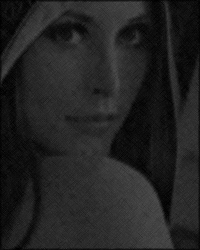

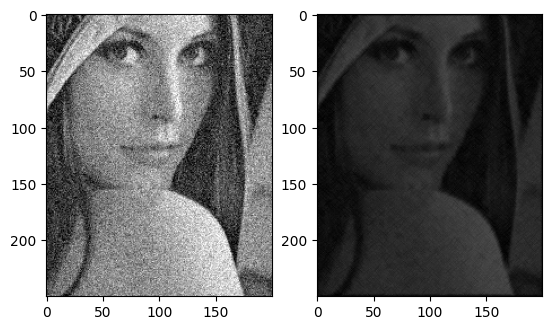

In [62]:
from skimage import io
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
from google.colab.patches import cv2_imshow

def create_x_pattern(size):
    arr = np.zeros((size, size), dtype=float)
    mid = size // 2

    arr[np.arange(size), np.arange(size)] = 1.0
    arr[np.arange(size), np.arange(size - 1, -1, -1)] = 1.0

    return arr

def create_subwindow(subwindow, position, original_size):
    extended_array = np.zeros((original_size, original_size), dtype=float)
    extended_array[position[0]:position[0] + subwindow.shape[0], position[1]:position[1] + subwindow.shape[1]] = subwindow
    return extended_array



def Kuwahara(original, winsize):
  image = original.astype(np.float64)# make sure window size is correct
  if winsize %4 != 1:raise Exception ("Invalid winsize %s: winsize must follow formula: w = 4*n+1." %winsize)
  #Build subwindows
  x_pattern = create_x_pattern(winsize)
  x_pattern = x_pattern/np.sum(x_pattern)
  subwindow_size = winsize // 2 + 1
# Create subwindows
  top_left_subwindow = x_pattern[:subwindow_size, :subwindow_size]
  top_right_subwindow = x_pattern[:subwindow_size, -subwindow_size:]
  bottom_left_subwindow = x_pattern[-subwindow_size:, :subwindow_size]
  bottom_right_subwindow = x_pattern[-subwindow_size:, -subwindow_size:]

  # tmpavgker is a 'north-west' subwindow (marked as 'a' above)
  # we build a vector of convolution kernels for computing average and
  # variance
  avgker = np.empty((4,winsize,winsize)) # make an empty vector of arrays
  avgker[0] = extend_subwindow(top_left_subwindow, (0, 0), winsize)# North-west (a)
  avgker[1] = extend_subwindow(top_right_subwindow, (0, winsize - subwindow_size), winsize)# North-east (b)
  avgker[2] = extend_subwindow(bottom_left_subwindow, (winsize - subwindow_size, 0), winsize)# South-west (c)
  avgker[3] = extend_subwindow(bottom_right_subwindow, (winsize - subwindow_size, winsize - subwindow_size), winsize)# South-east (d)
  # Create a pixel-by-pixel square of the image
  squaredImg = image**2
  # preallocate these arrays to make it apparently %15 faster
  avgs = np.zeros([4, image.shape[0],image.shape[1]])
  stddevs = avgs.copy()# Calculation of averages and variances on subwindows
  for k in range(4):
    # mean on subwindow
    avgs[k] = convolve2d(image, avgker[k],mode='same')
    # mean of squares on subwindow
    stddevs[k] = convolve2d(squaredImg, avgker[k],mode='same')
    # variance on subwindow
    stddevs[k] = stddevs[k]-avgs[k]**2

  # Choice of index with minimum variance
  indices = np.argmin(stddevs,0) # returns index of subwindow with smallest variance

  # Building the filtered image (with nested for loops)
  filtered = np.zeros(original.shape)
  for row in range(original.shape[0]):
    for col in range(original.shape[1]):
      filtered[row,col] = avgs[indices[row,col], row,col]

  #filtered=filtered.astype(np.uint8)
  return filtered.astype(np.uint8)

c = io.imread('/content/drive/MyDrive/digImage/noisy.png')
cK=Kuwahara(c,5)
fig = plt.figure()
  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(c/255,vmax=1.0,vmin=0.0)
ax2.imshow(cK/255,vmax=1.0,vmin=0.0)


In [63]:
io.imsave('/content/drive/MyDrive/digImage/kuwaharaResult.png',cK)